In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import heapq
import seaborn as sns
import itertools

In [8]:
df = pd.read_csv("final.csv")
df.head()

,remote_host,request_first_line,request_method,request_url,request_http_ver,request_url_netloc,request_url_path,request_url_query,request_url_fragment,request_url_username,...,request_url_hostname,request_url_port,request_url_query_dict,request_url_query_list,request_url_query_simple_dict,status,response_bytes_clf,request_header_referer,request_header_user_agent,Country
0,83.149.9.216,GET /presentations/logstash-monitorama-2013/im...,GET,/presentations/logstash-monitorama-2013/images...,1.1,NaN,/presentations/logstash-monitorama-2013/images...,NaN,NaN,NaN,...,NaN,NaN,{},[],{},200,203023,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...,Russia
1,83.149.9.216,GET /presentations/logstash-monitorama-2013/im...,GET,/presentations/logstash-monitorama-2013/images...,1.1,NaN,/presentations/logstash-monitorama-2013/images...,NaN,NaN,NaN,...,NaN,NaN,{},[],{},200,171717,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...,Russia
2,83.149.9.216,GET /presentations/logstash-monitorama-2013/pl...,GET,/presentations/logstash-monitorama-2013/plugin...,1.1,NaN,/presentations/logstash-monitorama-2013/plugin...,NaN,NaN,NaN,...,NaN,NaN,{},[],{},200,26185,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...,Russia
3,83.149.9.216,GET /presentations/logstash-monitorama-2013/pl...,GET,/presentations/logstash-monitorama-2013/plugin...,1.1,NaN,/presentations/logstash-monitorama-2013/plugin...,NaN,NaN,NaN,...,NaN,NaN,{},[],{},200,7697,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...,Russia
4,83.149.9.216,GET /presentations/logstash-monitorama-2013/pl...,GET,/presentations/logstash-monitorama-2013/plugin...,1.1,NaN,/presentations/logstash-monitorama-2013/plugin...,NaN,NaN,NaN,...,NaN,NaN,{},[],{},200,2892,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...,Russia


In [6]:
# ipCounts = dict(df["remote_host"].value_counts())
# ipCounts


# ip = list(map(str, list(ipCounts.keys())))
# ipFrequency = list(ipCounts.values())
# patches, texts = plt.pie(ipFrequency)
# plt.legend(patches, ip, loc="best")
# plt.axis('equal')
# plt.tight_layout()
# plt.show()

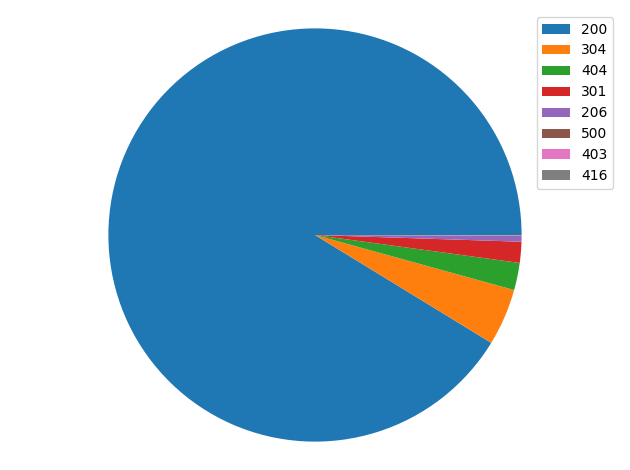

In [7]:
statusCodeCounts = dict(df["status"].value_counts())
statusCodeCounts
statusCodes = list(map(str, list(statusCodeCounts.keys())))
statusCounts = list(statusCodeCounts.values())
#plot pie
patches, texts = plt.pie(statusCounts)
plt.legend(patches, statusCodes, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [8]:
countryCounts = dict(df['Country'].value_counts())
new = heapq.nlargest(10, countryCounts, key=countryCounts.values)
# countryName = list(countryCounts.keys())
# countryNameCounts = list(countryCounts.values())
new
# fig = plt.figure(figsize = (20, 10))
# plt.bar(countryName, countryNameCounts, width=0.8)
# plt.show()

TypeError: dict.values() takes no arguments (1 given)

In [9]:
for col_name in df.columns:
    print(col_name, end="\n")

remote_host
request_first_line
request_method
request_url
request_http_ver
request_url_netloc
request_url_path
request_url_query
request_url_fragment
request_url_username
request_url_password
request_url_hostname
request_url_port
request_url_query_dict
request_url_query_list
request_url_query_simple_dict
status
response_bytes_clf
request_header_referer
request_header_user_agent
Country


Text(0, 0.5, 'Number of requests')

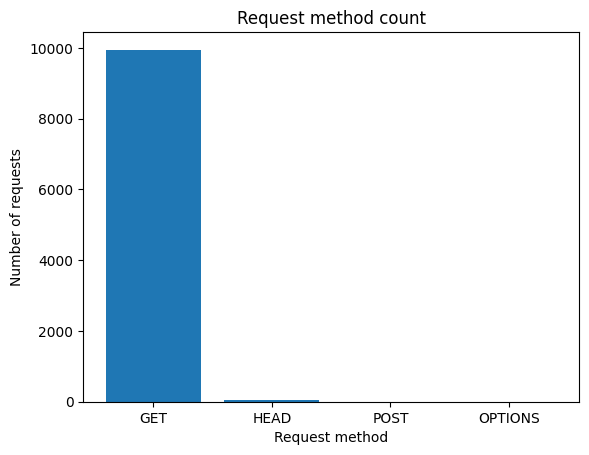

In [9]:
df["request_method"].value_counts()
request_method_data = dict(df["request_method"].value_counts())
plt.bar(request_method_data.keys(), request_method_data.values())
plt.title("Request method count")
plt.xlabel("Request method")
plt.ylabel("Number of requests")

([<matplotlib.axis.XTick at 0x1eec3c732b0>,
 [Text(0.0, 0, '66.249.73.135'),
  Text(1.0, 0, '46.105.14.53'),
  Text(2.0, 0, '130.237.218.86'),
  Text(3.0, 0, '75.97.9.59'),
  Text(4.0, 0, '50.16.19.13'),
  Text(5.0, 0, '209.85.238.199'),
  Text(6.0, 0, '68.180.224.225'),
  Text(7.0, 0, '100.43.83.137'),
  Text(8.0, 0, '208.115.111.72'),
  Text(9.0, 0, '198.46.149.143')])

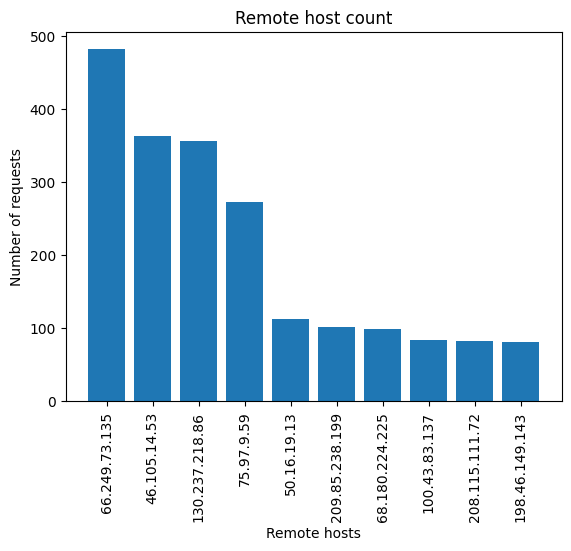

In [15]:
remote_host_data = dict(df["remote_host"].value_counts())
asdf = {k: v for k, v in sorted(remote_host_data.items(), reverse=True, key=lambda item: item[1])}
zxcv = dict(itertools.islice(asdf.items(), 10))

plt.bar(zxcv.keys(), zxcv.values())
plt.title("Remote host count")
plt.xlabel("Remote hosts")
plt.ylabel("Number of requests")
plt.xticks(list(zxcv.keys()), rotation=90)

In [16]:
zxcv
top_remote_hosts = list(zxcv.keys())
top_remote_hosts

['66.249.73.135',
 '46.105.14.53',
 '130.237.218.86',
 '75.97.9.59',
 '50.16.19.13',
 '209.85.238.199',
 '68.180.224.225',
 '100.43.83.137',
 '208.115.111.72',
 '198.46.149.143']

In [12]:
df_remotehost_country = df[["remote_host", "Country"]]
df_remotehost_country.head()

,remote_host,Country
0,83.149.9.216,Russia
1,83.149.9.216,Russia
2,83.149.9.216,Russia
3,83.149.9.216,Russia
4,83.149.9.216,Russia


In [17]:
df_new = df_remotehost_country[df_remotehost_country["remote_host"].isin(top_remote_hosts)]
df_new["new_col"] = df_new["remote_host"] + "\n" + df_new["Country"]
df_new

C:\Users\NAVYA\AppData\Local\Temp\ipykernel_19876\3229801514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["new_col"] = df_new["remote_host"] + "\n" + df_new["Country"]


,remote_host,Country,new_col
30,66.249.73.135,United States,66.249.73.135\nUnited States
31,50.16.19.13,United States,50.16.19.13\nUnited States
34,46.105.14.53,France,46.105.14.53\nFrance
48,66.249.73.135,United States,66.249.73.135\nUnited States
49,66.249.73.135,United States,66.249.73.135\nUnited States
...,...,...,...
9990,198.46.149.143,United States,198.46.149.143\nUnited States
9991,198.46.149.143,United States,198.46.149.143\nUnited States
9993,100.43.83.137,Russia,100.43.83.137\nRussia
9996,66.249.73.135,United States,66.249.73.135\nUnited States


([<matplotlib.axis.XTick at 0x1eec3d16380>,
 [Text(0.0, 0, '66.249.73.135\nUnited States'),
  Text(1.0, 0, '46.105.14.53\nFrance'),
  Text(2.0, 0, '130.237.218.86\nSweden'),
  Text(3.0, 0, '75.97.9.59\nUnited States'),
  Text(4.0, 0, '50.16.19.13\nUnited States'),
  Text(5.0, 0, '209.85.238.199\nUnited States'),
  Text(6.0, 0, '68.180.224.225\nUnited States'),
  Text(7.0, 0, '100.43.83.137\nRussia'),
  Text(8.0, 0, '208.115.111.72\nUnited States'),
  Text(9.0, 0, '198.46.149.143\nUnited States')])

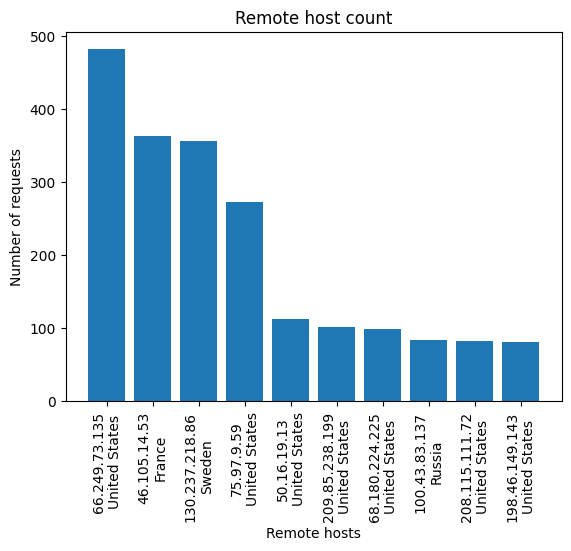

In [18]:
gg = dict(df_new["new_col"].value_counts())
plt.bar(gg.keys(), gg.values())
plt.title("Remote host count")
plt.xlabel("Remote hosts")
plt.ylabel("Number of requests")
plt.xticks(list(gg.keys()), rotation=90)

In [19]:
df.head()
df["Country"].value_counts()
list(df["Country"].unique())

['Russia',
 'United States',
 'Romania',
 'Indonesia',
 'France',
 'China',
 'Guatemala',
 'Belgium',
 'Germany',
 'Japan',
 'United Kingdom',
 'Algeria',
 'Singapore',
 'Netherlands',
 'Brazil',
 'South Korea',
 'Hong Kong',
 'Ukraine',
 'Austria',
 'India',
 'Cambodia',
 'Denmark',
 'Finland',
 'Poland',
 'Ireland',
 nan,
 'Canada',
 'Moldova',
 'Sudan',
 'Czechia',
 'Turkey',
 'Greece',
 'Thailand',
 'Colombia',
 'Norway',
 'Mexico',
 'Estonia',
 'Italy',
 'The address 208.93.0.48 is not in the database.',
 'Venezuela',
 'Bulgaria',
 'Kuwait',
 'Latvia',
 'Israel',
 'Sweden',
 'United Arab Emirates',
 'Spain',
 'Luxembourg',
 'Croatia',
 'Iran',
 'Libya',
 'Mozambique',
 'Belize',
 'Hungary',
 'Switzerland',
 'Argentina',
 'Slovakia',
 'Australia',
 'Morocco',
 'Taiwan',
 'Slovenia',
 'Iraq',
 'Portugal',
 'Myanmar',
 'Philippines',
 'New Zealand',
 'Peru',
 'Vietnam',
 'Saudi Arabia',
 'Malaysia',
 'Kazakhstan',
 'Lebanon',
 'South Africa',
 'Chile',
 'Ghana',
 'Serbia',
 'Rwanda',

In [ ]:

import plotly.express as px

df = px.data.gapminder().query("year==2007")
fig = px.choropleth(df, locations="iso_alpha",
                    color="lifeExp", # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()